In [ ]:
# Objective:
# Task involves segmenting the customers base using demographic data.
# The goal is to identify distinct customer groups based on demographic factors such as age, gender, income, spends, and any other relevant information.
# The insights gained from this segmentation will help tailor marketing strategies and improve overall customer satisfaction.

# Note: Save the customer data in a new CSV file, where each customer is labeled with their respective cluster class based on the clustering analysis.

Data Cleaning

In [67]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [89]:
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [90]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [92]:
combining_columns_amount = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df["Amount"] = df[combining_columns_amount].sum(axis=1)

combining_columns_total_purchases = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases" ]
df["TotalPurchases"] = df[combining_columns_total_purchases].sum(axis=1)

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Years_Since_Registration'] = (datetime.now() - df['Dt_Customer']).dt.days/365.25

df = df.drop(combining_columns_amount, axis=1)
df = df.drop(combining_columns_total_purchases, axis=1)
df = df.drop(["Z_CostContact", "Z_Revenue"], axis=1)
df = df.drop("Year_Birth", axis=1)
df = df.drop("Dt_Customer", axis=1)

<ipython-input-92-0b9d0aeafe6c>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [93]:
marketing_campaign = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5" ]
df = df.drop(marketing_campaign, axis=1)

In [94]:
df = df[df['Income']<=100000]

In [95]:
df.nunique()

ID                          2203
Education                      5
Marital_Status                 8
Income                      1961
Kidhome                        3
Teenhome                       3
Recency                      100
NumWebVisitsMonth             16
Complain                       2
Response                       2
Amount                      1042
TotalPurchases                37
Age                           59
Years_Since_Registration     662
dtype: int64

In [96]:
unique_values = df.apply(lambda x : x.unique())
unique_values

ID                          [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...
Education                          [Graduation, PhD, Master, Basic, 2n Cycle]
Marital_Status              [Single, Together, Married, Divorced, Widow, A...
Income                      [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome                                                             [0, 1, 2]
Teenhome                                                            [0, 1, 2]
Recency                     [58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5...
NumWebVisitsMonth           [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19,...
Complain                                                               [0, 1]
Response                                                               [1, 0]
Amount                      [1617, 27, 776, 53, 422, 716, 590, 169, 46, 49...
TotalPurchases              [25, 6, 21, 8, 19, 22, 10, 2, 16, 15, 5, 26, 9...
Age                         [67, 70, 59, 40, 43, 57, 53, 39, 50,

In [97]:
columns_to_keep = ['Income', 'Age', 'Amount']
X = df.loc[:, columns_to_keep]

In [98]:
X

,Income,Age,Amount
0,58138.0,67,1617
1,46344.0,70,27
2,71613.0,59,776
3,26646.0,40,53
4,58293.0,43,422
...,...,...,...
2235,61223.0,57,1341
2236,64014.0,78,444
2237,56981.0,43,1241
2238,69245.0,68,843


Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
encoded_columns = ["Education", "Marital_Status"]
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

<ipython-input-74-84ba6832a24c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = label_encoder.fit_transform(df['Education'])
<ipython-input-74-84ba6832a24c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])


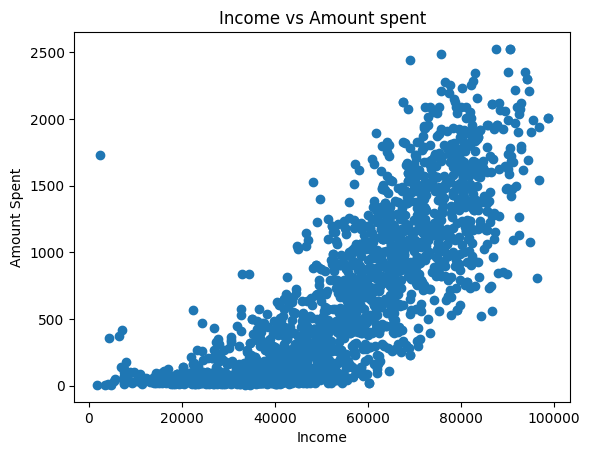

In [61]:
plt.scatter(df["Income"], df["Amount"], df, marker='o')
plt.title('Income vs Amount spent')
plt.xlabel('Income')
plt.ylabel('Amount Spent')
plt.show()

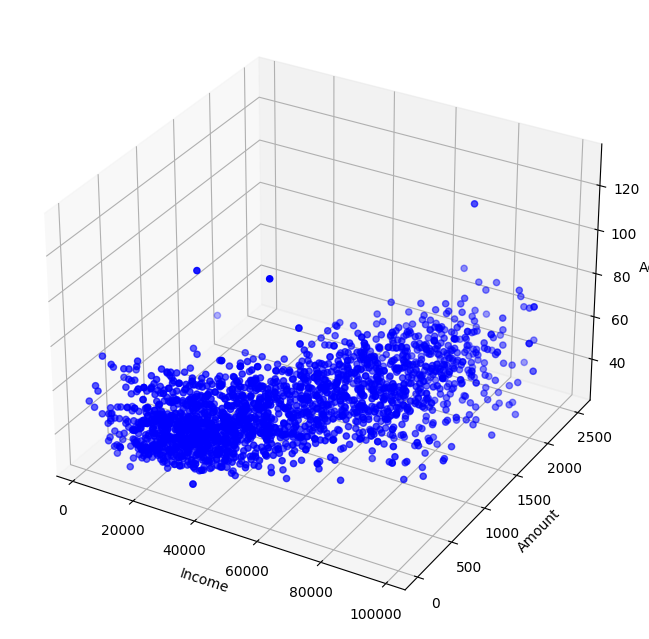

In [102]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Income'], df['Amount'], df['Age'], c='blue', marker='o')
ax.set_xlabel('Income')
ax.set_ylabel('Amount')
ax.set_zlabel('Age')
plt.show()

Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

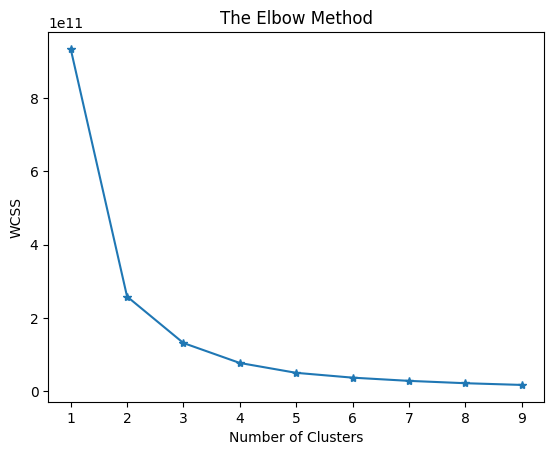

In [103]:
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss, marker='*')
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

KMeans Clustering

In [120]:
kmeans = KMeans(n_clusters = 3, init="k-means++", random_state=42)
y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [121]:
y.shape

(2203,)

In [122]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

Visualising

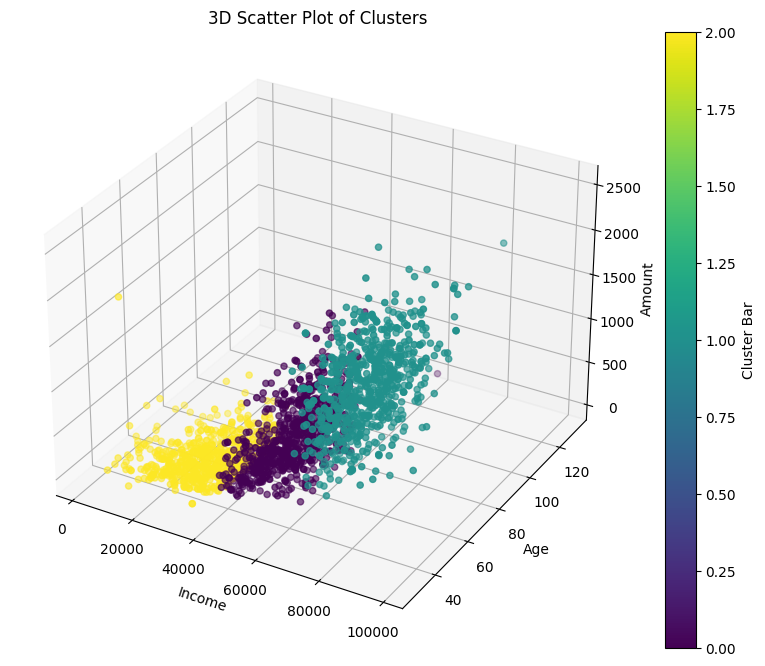

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'Income', 'Age', and 'Amount', colored by clusters
scatter = ax.scatter(X['Income'], X['Age'], X['Amount'], c=y, cmap='viridis', marker='o')

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Amount')
ax.set_title('3D Scatter Plot of Clusters')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Bar')

plt.show()


Storing

In [124]:
y_mapping = {0: "Low", 1: "Average", 2:"High"}
df["Cluster_labels"] = pd.Series(y).map(y_mapping)
df.to_csv("cluster_mapping.csv")